In [1]:
from __future__ import division

In [2]:
#set cell width to full
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
%matplotlib inline
from datetime import datetime
import matplotlib.pyplot as plt
import math
import ast
import csv
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import sys
import imp
from analysis_tools import *
# importlib.import_module()
pd.set_option('display.max_columns', None)

In [4]:
imp.reload(sys.modules['analysis_tools'])

<module 'analysis_tools' from 'analysis_tools.pyc'>

In [5]:
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [6]:
## PLOT GPE VS GPAO BINNED
def plot_grade_benefit(mydf, order=1, by='N_views_2bin', xbins=8, xlim=(2.5,4), ylim=(1,4)):
    """PLOT GPE VS GPAO BINNED. Fit polynomial of specified order (done on unbinned data). 
    Split by 'by' column (N_views_2bin by default)"""
#     for cid in mydf['course_id'].unique():
#         my_ytcs = get_ytcs_with(ytc_substr=cid, ytclist=mydf['year_term_course'].unique())
#         f,axes = plt.subplots((1,2))
    for i,my_ytc in enumerate(mydf['year_term_course'].unique()):
        lm=sns.lmplot('gpao', y='gpe', x_bins=xbins, data=mydf[mydf['year_term_course']==my_ytc], hue=by, order=order)
        lm.axes[0,0].set_xlim(*xlim)#2.5,4)
        lm.axes[0,0].set_ylim(*ylim)#1,4)
        plt.grid(True)
        plt.title(my_ytc)
        plt.show()
            

In [7]:
CHEM_Full = get_full_course_df(['2013_FA_CHEM130', '2014_WN_CHEM130', '2014_FA_CHEM130', '2015_WN_CHEM130', '2015_FA_CHEM130', '2016_WN_CHEM130', '2016_FA_CHEM130', '2017_WN_CHEM130'], 
                              keep_nonusers = False)


Reading in data from  Data/by_ytc/responses_2013_FA_CHEM130.h5
Dropping 19769 abandoned responses (3.49%)
New length: 546113
loading user data from  Data/user_data_v2d0.h5
Merging in user_data
Dropping 70 users that were in responses data but not user_df (4.9%)
29 users in user_df that are in ytc but who did not have any responses. (2.1%)
Dropping nonusers.
539608
N entries after merge  539608
Merging in abandon_rates

Reading in data from  Data/by_ytc/responses_2014_WN_CHEM130.h5
Dropping 8733 abandoned responses (3.87%)
New length: 217208
Merging in user_data
Dropping 61 users that were in responses data but not user_df (10.9%)
8 users in user_df that are in ytc but who did not have any responses. (1.6%)
Dropping nonusers.
213807
N entries after merge  213807
Merging in abandon_rates

Reading in data from  Data/by_ytc/responses_2014_FA_CHEM130.h5
Dropping 5890 abandoned responses (1.12%)
New length: 519074
Merging in user_data
Dropping 73 users that were in responses data but not us

In [8]:
STATS_Full = get_full_course_df(['2014_WN_STATS250', '2014_FA_STATS250', '2015_WN_STATS250', '2015_FA_STATS250'], 
                              keep_nonusers = False)


Reading in data from  Data/by_ytc/responses_2014_WN_STATS250.h5
Dropping 2613 abandoned responses (2.25%)
New length: 113319
loading user data from  Data/user_data_v2d0.h5
Merging in user_data
Dropping 36 users that were in responses data but not user_df (3.2%)
332 users in user_df that are in ytc but who did not have any responses. (23.6%)
Dropping nonusers.
112715
N entries after merge  112715
Merging in abandon_rates

Reading in data from  Data/by_ytc/responses_2014_FA_STATS250.h5
Dropping 1348 abandoned responses (0.712%)
New length: 188036
Merging in user_data
Dropping 39 users that were in responses data but not user_df (3.0%)
265 users in user_df that are in ytc but who did not have any responses. (17.1%)
Dropping nonusers.
187246
N entries after merge  187246
Merging in abandon_rates

Reading in data from  Data/by_ytc/responses_2015_WN_STATS250.h5
Dropping 1871 abandoned responses (0.732%)
New length: 253638
Merging in user_data
Dropping 34 users that were in responses data bu

In [9]:
PHYSICS_Full = get_full_course_df(['2014_WN_PHYSICS140', '2014_FA_PHYSICS140', '2015_WN_PHYSICS140', '2015_FA_PHYSICS140'], 
                              keep_nonusers = False)


Reading in data from  Data/by_ytc/responses_2014_WN_PHYSICS140.h5
Dropping 2855 abandoned responses (4.31%)
New length: 63391
loading user data from  Data/user_data_v2d0.h5
Merging in user_data
Dropping 42 users that were in responses data but not user_df (7.7%)
157 users in user_df that are in ytc but who did not have any responses. (23.6%)
Dropping nonusers.
58940
N entries after merge  58940
Merging in abandon_rates

Reading in data from  Data/by_ytc/responses_2014_FA_PHYSICS140.h5
Dropping 361 abandoned responses (1.61%)
New length: 22097
Merging in user_data
Dropping 48 users that were in responses data but not user_df (13.4%)
244 users in user_df that are in ytc but who did not have any responses. (44.0%)
Dropping nonusers.
20061
N entries after merge  20061
Merging in abandon_rates

Reading in data from  Data/by_ytc/responses_2015_WN_PHYSICS140.h5
Dropping 622 abandoned responses (1.55%)
New length: 39481
Merging in user_data
Dropping 34 users that were in responses data but no

Text(0,0.5,'session number(log)')

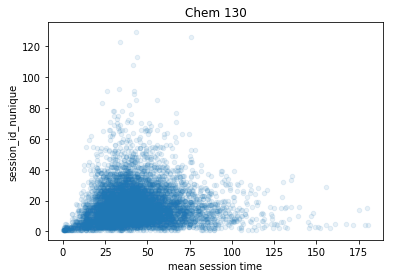

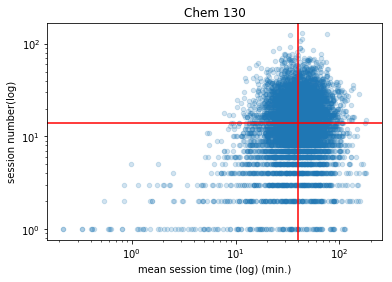

In [21]:
CHEM_Full['total time spend'] = CHEM_Full['t_response_mean'] * CHEM_Full['N_views']/60
CHEM_Full['mean session time'] = CHEM_Full['total time spend']/CHEM_Full['session_id_nunique']
CHEM_Full.plot(x= 'mean session time', y= 'session_id_nunique', kind='scatter', alpha = 0.1, title = 'Chem 130', )
CHEM_Full.plot(x= 'mean session time', y= 'session_id_nunique', kind='scatter', loglog=True, alpha = 0.2, title = 'Chem 130')
plt.axvline(x=40, color = 'red')
plt.axhline(y= 14, color = 'red')
plt.xlabel('mean session time (log) (min.)')
plt.ylabel('session number(log)')

In [11]:
CHEM_Full.loc[:, 'session_id_nunique'].quantile([0.25, 0.5,0.75])

0.25     8.0
0.50    14.0
0.75    22.0
Name: session_id_nunique, dtype: float64

In [12]:
CHEM_Full.loc[:, 'mean session time'].quantile([0.25, 0.5, 0.75])

0.25    29.262061
0.50    39.971920
0.75    53.131250
Name: mean session time, dtype: float64

In [13]:
def f(row):
    if row['session_id_nunique'] >= 14:
        val = 'many sessions'
    elif row['session_id_nunique'] < 14:
        val = 'few sessions'
    return val

def g(row):
    if row['mean session time'] >= 40:
        val = 'long session'
    elif row['mean session time'] < 40:
        val = 'short session'
    return val


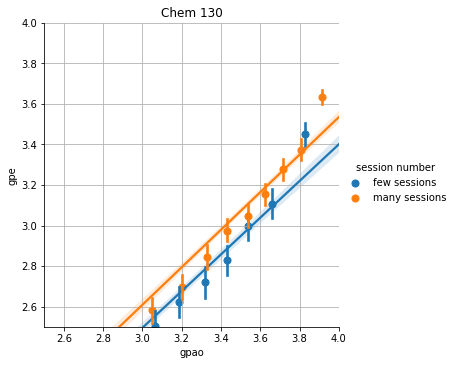

In [14]:
CHEM_Full['session number'] = CHEM_Full.apply(f, axis =1)
#lm = sns.lmplot('gpao', y='gpe',x_bins = 10, data=CHEM_Full, hue='session number', order = 1, color = ['color1'].apply(lambda x:colormap[x]))
lm = sns.lmplot('gpao', y='gpe',x_bins = 10, data=CHEM_Full, hue='session number', order = 1)
lm.axes[0,0].set_xlim(*(2.5,4))#2.5,4)
lm.axes[0,0].set_ylim(*(2.5,4))#1,4)
plt.grid(True)
plt.title("Chem 130")
plt.show()
#plot_grade_benefit (CHEM_Full, by = 'session number')

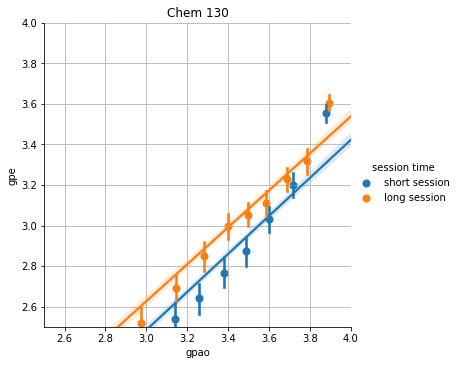

In [15]:
CHEM_Full['session time'] = CHEM_Full.apply(g, axis =1)
#plot_grade_benefit (CHEM_Full, by = 'session time')
lm = sns.lmplot('gpao', y='gpe',x_bins = 10, data=CHEM_Full, hue='session time', order = 1)
lm.axes[0,0].set_xlim(*(2.5,4))#2.5,4)
lm.axes[0,0].set_ylim(*(2.5,4))#1,4)
plt.grid(True)
plt.title("Chem 130")
plt.show()

In [14]:
def h(row):
    if (row['session number'] == 'many sessions' and row['session time'] == 'long session'):
        val = 'many and long'
    elif (row['session number'] == 'few sessions' and row['session time'] == 'short session'):
        val = 'few and short'
    else:
        val = "regular"
    return val


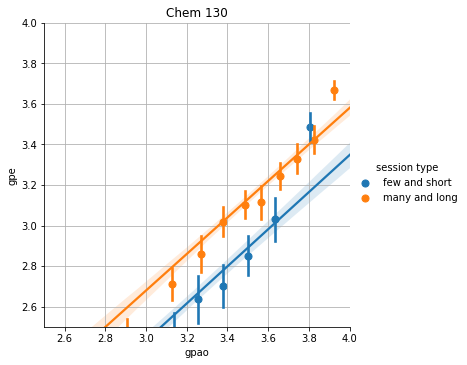

In [15]:
CHEM_Full['session type'] = CHEM_Full.apply(h, axis =1)
#plot_grade_benefit (CHEM_Full[CHEM_Full['session type'] != 'regular'], by = 'session type')
lm = sns.lmplot('gpao', y='gpe',x_bins = 10, data=CHEM_Full[CHEM_Full['session type'] != 'regular'], hue='session type', order = 1)
lm.axes[0,0].set_xlim(*(2.5,4))#2.5,4)
lm.axes[0,0].set_ylim(*(2.5,4))#1,4)
plt.grid(True)
plt.title('Chem 130')
plt.show()

Text(0,0.5,'session number (log)')

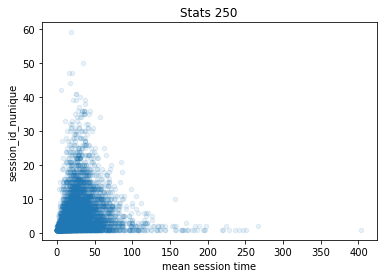

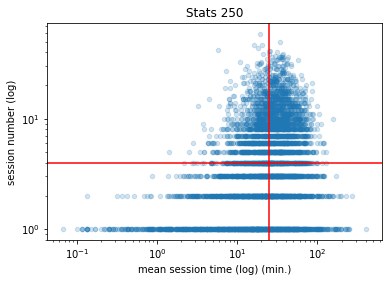

In [22]:
STATS_Full['total time spend'] = STATS_Full['t_response_mean'] * STATS_Full['N_views'] /60
STATS_Full['mean session time'] = STATS_Full['total time spend']/STATS_Full['session_id_nunique']
STATS_Full.plot(x= 'mean session time', y= 'session_id_nunique', kind='scatter', alpha = 0.1, title = 'Stats 250')
STATS_Full.plot(x= 'mean session time', y= 'session_id_nunique', kind='scatter', loglog = True, alpha=0.2, title = 'Stats 250')
plt.axvline(x=25, color = 'red')
plt.axhline(y= 4, color = 'red')
plt.xlabel('mean session time (log) (min.)')
plt.ylabel('session number (log)')

In [40]:
STATS_Full.loc[:, 'session_id_nunique'].quantile([0.25, 0.5,0.75])

0.25    2.0
0.50    4.0
0.75    8.0
Name: session_id_nunique, dtype: float64

In [41]:
STATS_Full.loc[:, 'mean session time'].quantile([0.25, 0.5, 0.75])

0.25    13.718182
0.50    24.841667
0.75    38.737037
Name: mean session time, dtype: float64

In [17]:
def f(row):
    if row['session_id_nunique'] >= 4:
        val = 'many sessions'
    elif row['session_id_nunique'] <4:
        val = 'few sessions'
    return val

def g(row):
    if row['mean session time'] >= 24:
        val = 'long session'
    elif row['mean session time'] <24:
        val = 'short session'
    return val



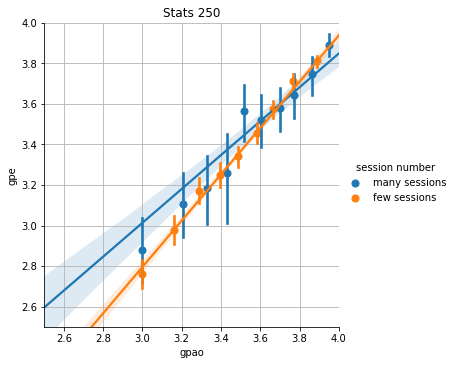

In [46]:
STATS_Full['session number'] = STATS_Full.apply(f, axis =1)
#plot_grade_benefit (STATS_Full, by = 'session number')
lm = sns.lmplot('gpao', y='gpe',x_bins = 10, data=STATS_Full, hue='session number', order = 1)
lm.axes[0,0].set_xlim(*(2.5,4))#2.5,4)
lm.axes[0,0].set_ylim(*(2.5,4))#1,4)
plt.grid(True)
plt.title('Stats 250')
plt.show()

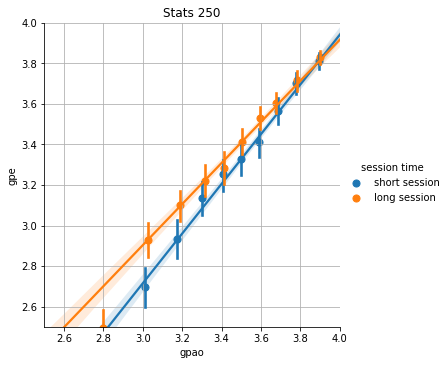

In [19]:
STATS_Full['session time'] = STATS_Full.apply(g, axis =1)
#plot_grade_benefit (STATS_Full, by = 'session time')
lm = sns.lmplot('gpao', y='gpe',x_bins = 10, data=STATS_Full, hue='session time', order = 1)
lm.axes[0,0].set_xlim(*(2.5,4))#2.5,4)
lm.axes[0,0].set_ylim(*(2.5,4))#1,4)
plt.grid(True)
plt.title('Stats 250')
plt.show()

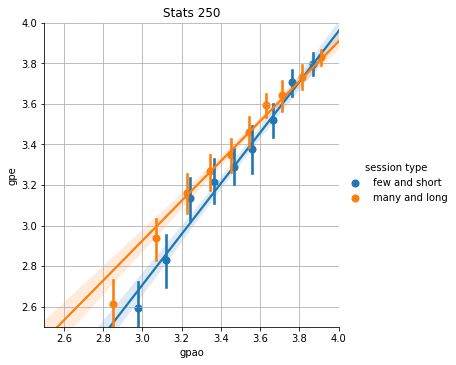

In [21]:
STATS_Full['session type'] = STATS_Full.apply(h, axis =1)
#plot_grade_benefit (STATS_Full[STATS_Full['session type'] != 'regular'], by = 'session type')
lm = sns.lmplot('gpao', y='gpe',x_bins = 10, data=STATS_Full[STATS_Full['session type'] != 'regular'], hue='session type', order = 1)
lm.axes[0,0].set_xlim(*(2.5,4))#2.5,4)
lm.axes[0,0].set_ylim(*(2.5,4))#1,4)
plt.grid(True)
plt.title('Stats 250')
plt.show()

Text(0,0.5,'session number (log)')

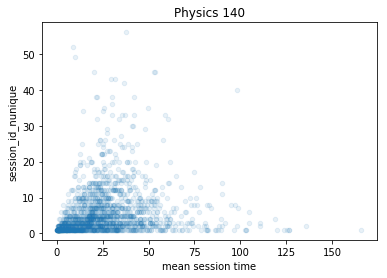

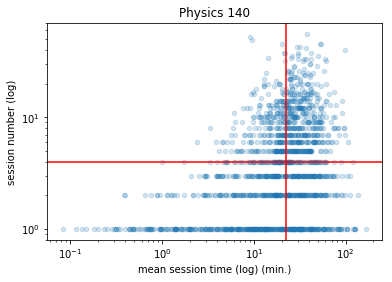

In [23]:
PHYSICS_Full['total time spend'] = PHYSICS_Full['t_response_mean'] * PHYSICS_Full['N_views'] /60
PHYSICS_Full['mean session time'] = PHYSICS_Full['total time spend']/PHYSICS_Full['session_id_nunique']
PHYSICS_Full.plot(x= 'mean session time', y= 'session_id_nunique', kind='scatter', alpha = 0.1, title = 'Physics 140')
PHYSICS_Full.plot(x= 'mean session time', y= 'session_id_nunique', kind='scatter', loglog = True, alpha = 0.2, title = 'Physics 140')
plt.axvline(x=22.5, color = 'red')
plt.axhline(y= 4, color = 'red')
plt.xlabel('mean session time (log) (min.)')
plt.ylabel('session number (log)')

In [49]:
PHYSICS_Full.loc[:, 'session_id_nunique'].quantile([0.25, 0.5,0.75])

0.25    2.0
0.50    4.0
0.75    8.0
Name: session_id_nunique, dtype: float64

In [50]:
PHYSICS_Full.loc[:, 'mean session time'].quantile([0.25, 0.5, 0.75])

0.25    11.643750
0.50    22.325000
0.75    35.134325
Name: mean session time, dtype: float64

In [23]:
def f(row):
    if row['session_id_nunique'] >= 4:
        val = 'many sessions'
    elif row['session_id_nunique'] < 4:
        val = 'few sessions'
    return val

def g(row):
    if row['mean session time'] >= 22:
        val = 'long session'
    elif row['mean session time'] < 22:
        val = 'short session'
    return val


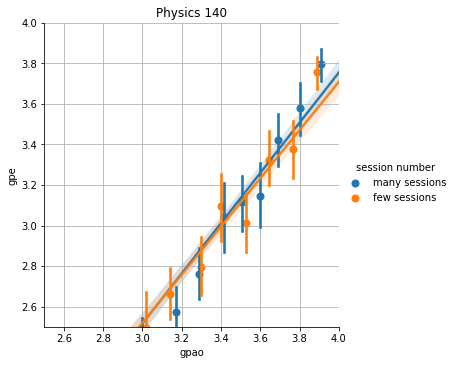

In [24]:
PHYSICS_Full['session number'] = PHYSICS_Full.apply(f, axis =1)
#plot_grade_benefit (PHYSICS_Full, by = 'session number')
lm = sns.lmplot('gpao', y='gpe',x_bins = 10, data=PHYSICS_Full, hue='session number', order = 1)
lm.axes[0,0].set_xlim(*(2.5,4))#2.5,4)
lm.axes[0,0].set_ylim(*(2.5,4))#1,4)
plt.grid(True)
plt.title('Physics 140')
plt.show()

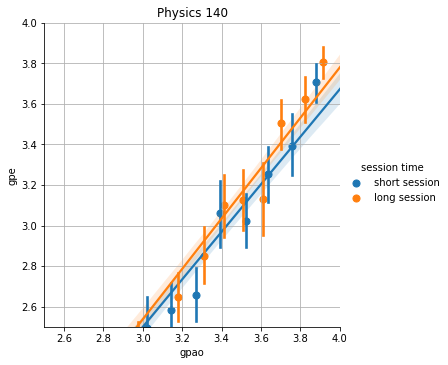

In [25]:
PHYSICS_Full['session time'] = PHYSICS_Full.apply(g, axis =1)
#plot_grade_benefit (PHYSICS_Full[PHYSICS_Full['session time'] != 'regular'], by = 'session time')
lm = sns.lmplot('gpao', y='gpe',x_bins = 10, data=PHYSICS_Full, hue='session time', order = 1)
lm.axes[0,0].set_xlim(*(2.5,4))#2.5,4)
lm.axes[0,0].set_ylim(*(2.5,4))#1,4)
plt.grid(True)
plt.title('Physics 140')
plt.show()

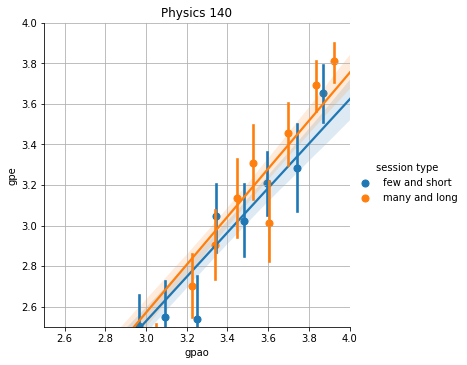

In [26]:
PHYSICS_Full['session type'] = PHYSICS_Full.apply(h, axis =1)
#plot_grade_benefit (PHYSICS_Full[PHYSICS_Full['session type'] != 'regular'], by = 'session type')
lm = sns.lmplot('gpao', y='gpe',x_bins = 10, data=PHYSICS_Full[PHYSICS_Full['session type'] != 'regular'], hue='session type', order = 1)
lm.axes[0,0].set_xlim(*(2.5,4))#2.5,4)
lm.axes[0,0].set_ylim(*(2.5,4))#1,4)
plt.grid(True)
plt.title('Physics 140')
plt.show()